In [1]:
import pandas as pd

# Read the Uber dataset
uber_df = pd.read_csv('uber.csv')

# Check for missing values
missing_values = uber_df.isnull().sum()
print("Missing values:\n", missing_values)

# Convert 'pickup_datetime' to datetime data type
uber_df['pickup_datetime'] = pd.to_datetime(uber_df['pickup_datetime'])


Missing values:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [2]:
# Drop rows with null values in the latitude and longitude columns
uber_df = uber_df.dropna(subset=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])


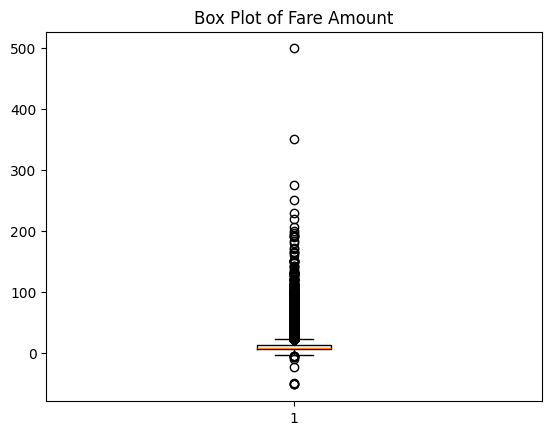

In [3]:
import matplotlib.pyplot as plt

# Create a box plot to identify outliers in the 'fare_amount' column
plt.boxplot(uber_df['fare_amount'])
plt.title('Box Plot of Fare Amount')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define features and target
X = uber_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
y = uber_df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [5]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 5.582868802233204
